In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv("SampleSuperstore.csv")
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [4]:
print(df.head(5))

        Ship Mode    Segment        Country  ... Quantity Discount    Profit
0    Second Class   Consumer  United States  ...        2     0.00   41.9136
1    Second Class   Consumer  United States  ...        3     0.00  219.5820
2    Second Class  Corporate  United States  ...        2     0.00    6.8714
3  Standard Class   Consumer  United States  ...        5     0.45 -383.0310
4  Standard Class   Consumer  United States  ...        2     0.20    2.5164

[5 rows x 13 columns]


In [5]:
df.shape

(9994, 13)

In [6]:
#Checking the column names
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [7]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
#checking the null values or missing items
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [9]:
#Checking the continuos and the Categorical Columns
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [10]:
#Checking if any duplicate row is there in the dataset
df.duplicated().sum()

17

In [12]:
#Removing 17 duplicated rows to avoid faults in further calculation
df.drop_duplicates(inplace=True)

In [13]:
#After removing duplicate entries
df.shape

(9977, 13)

In [14]:
#removing the unimportant columns
data=df.drop(['Country', 'Postal Code'], axis=1)
data.shape

(9977, 11)

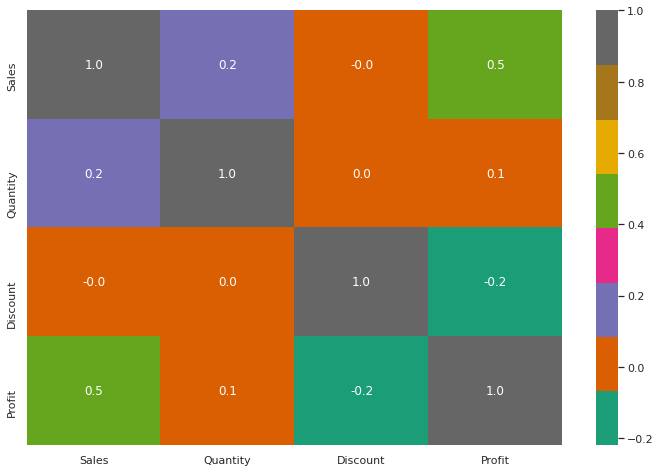

In [21]:
#Checking the corelations between numeric columns
df_con=data.select_dtypes(include=[np.number]) #getting the numeracal features
f,ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df_con.corr(method='pearson'), annot=True, fmt= '.1f',ax=ax, cmap="Dark2") #plotting a heatmap

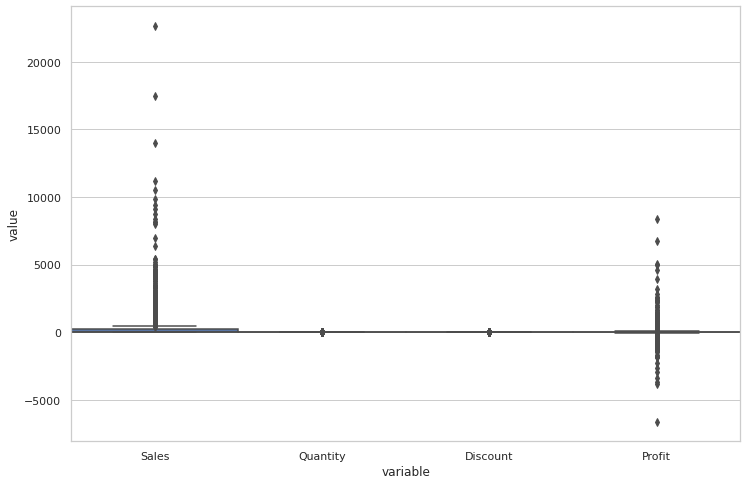

In [22]:
#BoxPlot to see the outliers clearly
plt.figure(figsize=[12,8])
sns.set(style="whitegrid")
sns.boxplot(x="variable", y="value", data=pd.melt(df_con), width=1)

plt.show()

In [23]:
#Removal of Outliers
def remove_outlier(dataset,k=3.33):
    for col in dataset.columns:
            if (dataset[col].dtype=="int64" or dataset[col].dtype=="float64"):
                mean = dataset[col].mean()
                global ds      
                std = dataset[col].std()    
                outlier = [i for i in dataset[col] if (i > mean - k * std)]
                outlier = [i for i in outlier if (i < mean + k * std)]       
                ds = dataset.loc[dataset[col].isin(outlier)]

In [24]:
remove_outlier(data,k=3.33)

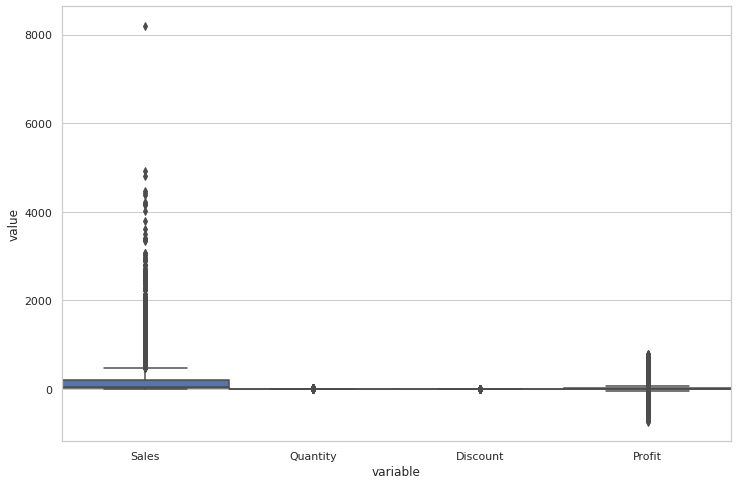

In [25]:
#Let's see the outliers are removed or not
ds_con=ds.select_dtypes(include=[np.number])
plt.figure(figsize=[12,8])
sns.set(style="whitegrid")
sns.boxplot(x="variable", y="value", data=pd.melt(ds_con), width=1)

plt.show()

encoding the categorical data

In [26]:
#Let's describe our data once again to get the useful values for each feature
ds.describe()

,Sales,Quantity,Discount,Profit
count,9889.000000,9889.000000,9889.000000,9889.000000
mean,196.570036,3.776519,0.155131,24.150294
std,383.949264,2.222506,0.204991,94.164961
min,0.444000,1.000000,0.000000,-734.526400
25%,17.088000,2.000000,0.000000,1.747200
50%,52.990000,3.000000,0.200000,8.611200
75%,203.520000,5.000000,0.200000,28.857600
max,8187.650000,14.000000,0.800000,793.716000


In [28]:
#What are the numbers of unique entries in the Categorical columns
for col in ds.columns:
    if ds[col].dtype=='object':
        print("Number of unique entries in",col + " are",ds[col].nunique())
        print("--------------------------------------------------")

Number of unique entries in Ship Mode are 4
--------------------------------------------------
Number of unique entries in Segment are 3
--------------------------------------------------
Number of unique entries in City are 531
--------------------------------------------------
Number of unique entries in State are 49
--------------------------------------------------
Number of unique entries in Region are 4
--------------------------------------------------
Number of unique entries in Category are 3
--------------------------------------------------
Number of unique entries in Sub-Category are 17
--------------------------------------------------


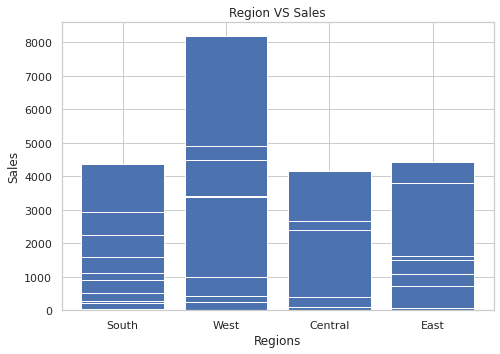

In [29]:
#Region wise sales plot
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ds['Region'],ds['Sales'])
plt.title("Region VS Sales")
plt.xlabel("Regions")
plt.ylabel("Sales")
plt.show()

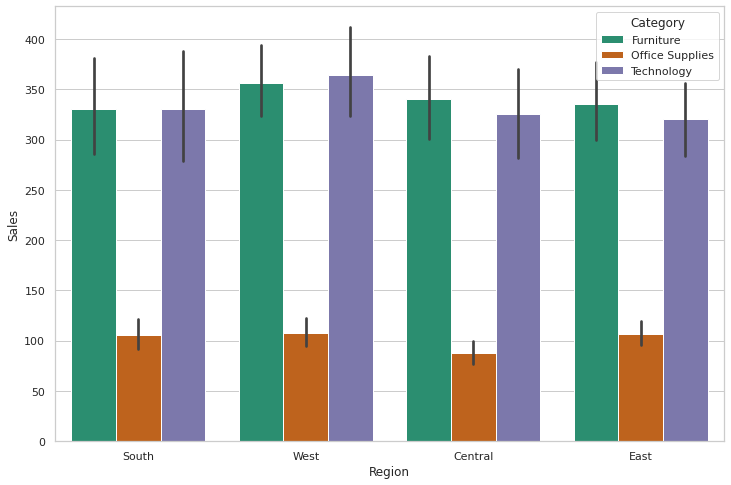

In [31]:
#Category wise sales in Each region
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Region", y="Sales", hue="Category", data=ds, palette="Dark2")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1080x576 with 0 Axes>

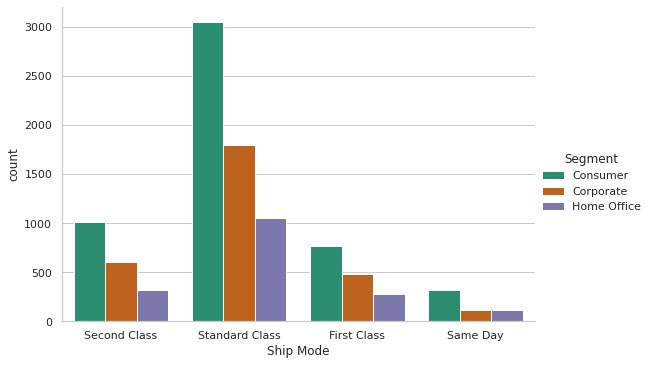

In [33]:
#Segment wise count of the ship modes
plt.figure(figsize=[15,8])
sns.catplot("Ship Mode", hue="Segment", data=ds, kind="count", aspect=1.5, palette="Dark2")

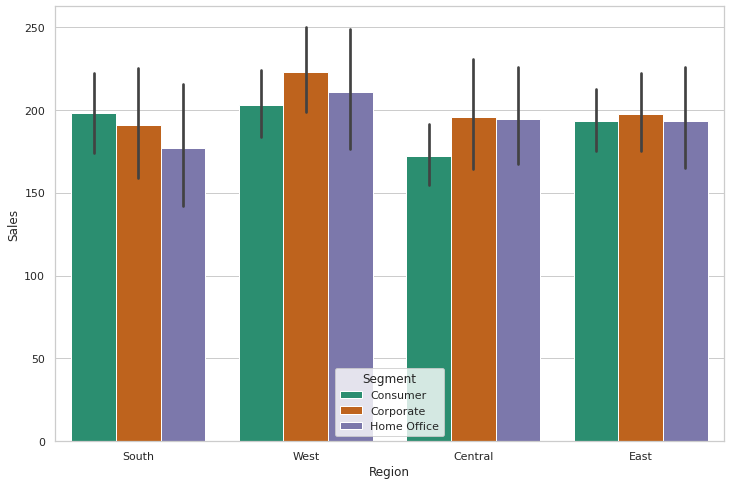

In [35]:
#Segment wise sales in Each region
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Region", y="Sales", hue="Segment", data=ds, palette="Dark2")

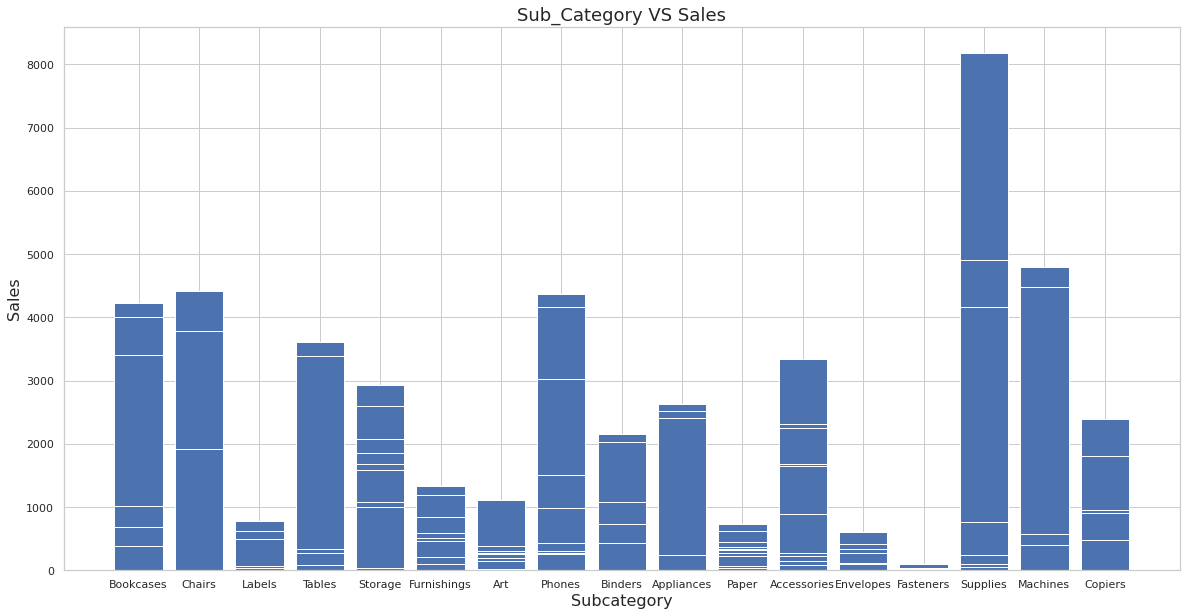

In [37]:
#Sales vs Subcategory
plt.figure(figsize=[20,10])
plt.bar("Sub-Category","Sales",data=ds)
plt.title("Sub_Category VS Sales",fontsize=18)
plt.xlabel("Subcategory", fontsize=16)
plt.ylabel("Sales",fontsize=16)
plt.show()

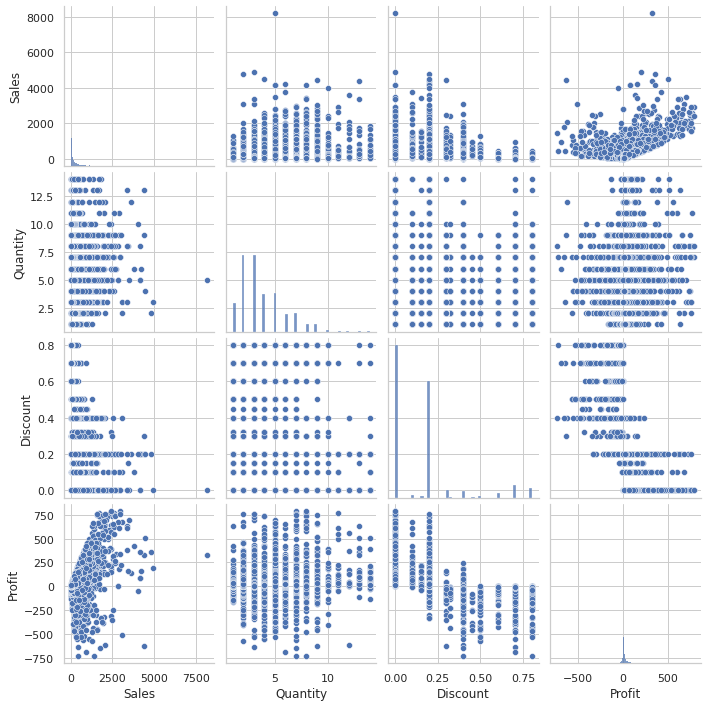

In [38]:
#Let's get some aggregated views from pairplot
sns.pairplot(ds)

In [39]:
#Let's get some insights based on Cities
grouped= ds.groupby("City")
#Aggregated Sales per city
agg_sales=grouped['Sales'].agg(np.sum).sort_values(ascending=False).reset_index()
#Cities with highest total sales
agg_sales.head()

,City,Sales
0,New York City,197246.023
1,Los Angeles,164434.549
2,San Francisco,109777.212
3,Seattle,96250.488
4,Philadelphia,91772.849


In [40]:
#Aggregated Profit per city
agg_profit=grouped['Profit'].agg(np.sum).sort_values(ascending=False).reset_index()
#Cities with Highest total Profit
agg_profit.head()

,City,Profit
0,New York City,39934.8107
1,Los Angeles,26544.4140
2,Seattle,18916.8467
3,San Francisco,16521.1321
4,Detroit,8200.3235


In [41]:
#Aggregate Discount per city
agg_dist=grouped['Discount'].agg(np.sum).sort_values(ascending=False).reset_index()

#Cities with highest aggregated Discount
agg_dist.head()

,City,Discount
0,Philadelphia,173.50
1,Houston,139.54
2,Chicago,117.90
3,Dallas,55.50
4,Los Angeles,54.70


In [44]:
#Average Sales per city
avg_sales=grouped['Sales'].agg(np.mean).sort_values(ascending=False).reset_index()
#Cities with highest Average sales
avg_sales.head()

,City,Sales
0,Cheyenne,1603.136000
1,Bellingham,1263.413333
2,Independence,1208.685000
3,Burbank,1082.386000
4,Buffalo,906.349600


In [45]:
#Cities with lowest Average sales
avg_sales.tail()
#Average Profit per city
avg_profit=grouped['Profit'].agg(np.mean).sort_values(ascending=False).reset_index()
#Cities with highest Average profit
avg_profit.head()

,City,Profit
0,Independence,487.831500
1,Appleton,277.383150
2,Burbank,254.844600
3,Lehi,225.831300
4,Beverly,218.306467


In [46]:
#Cities with lowest Average profit
avg_profit.tail()

,City,Profit
526,Rockford,-104.500709
527,Normal,-110.023200
528,Yuma,-116.497725
529,Oswego,-178.709200
530,Champaign,-182.352000


In [47]:
#Average Discount per city
avg_dist=grouped['Discount'].agg(np.mean).sort_values(ascending=False).reset_index()
#Cities with highest Average discount
avg_dist.head()

,City,Discount
0,Deer Park,0.8
1,Abilene,0.8
2,Missouri City,0.8
3,Romeoville,0.8
4,Littleton,0.7


In [48]:
#Cities with lowest Average Discount
avg_dist.tail()

,City,Discount
526,Jonesboro,0.0
527,Jefferson City,0.0
528,Jamestown,0.0
529,Saint Paul,0.0
530,Aberdeen,0.0


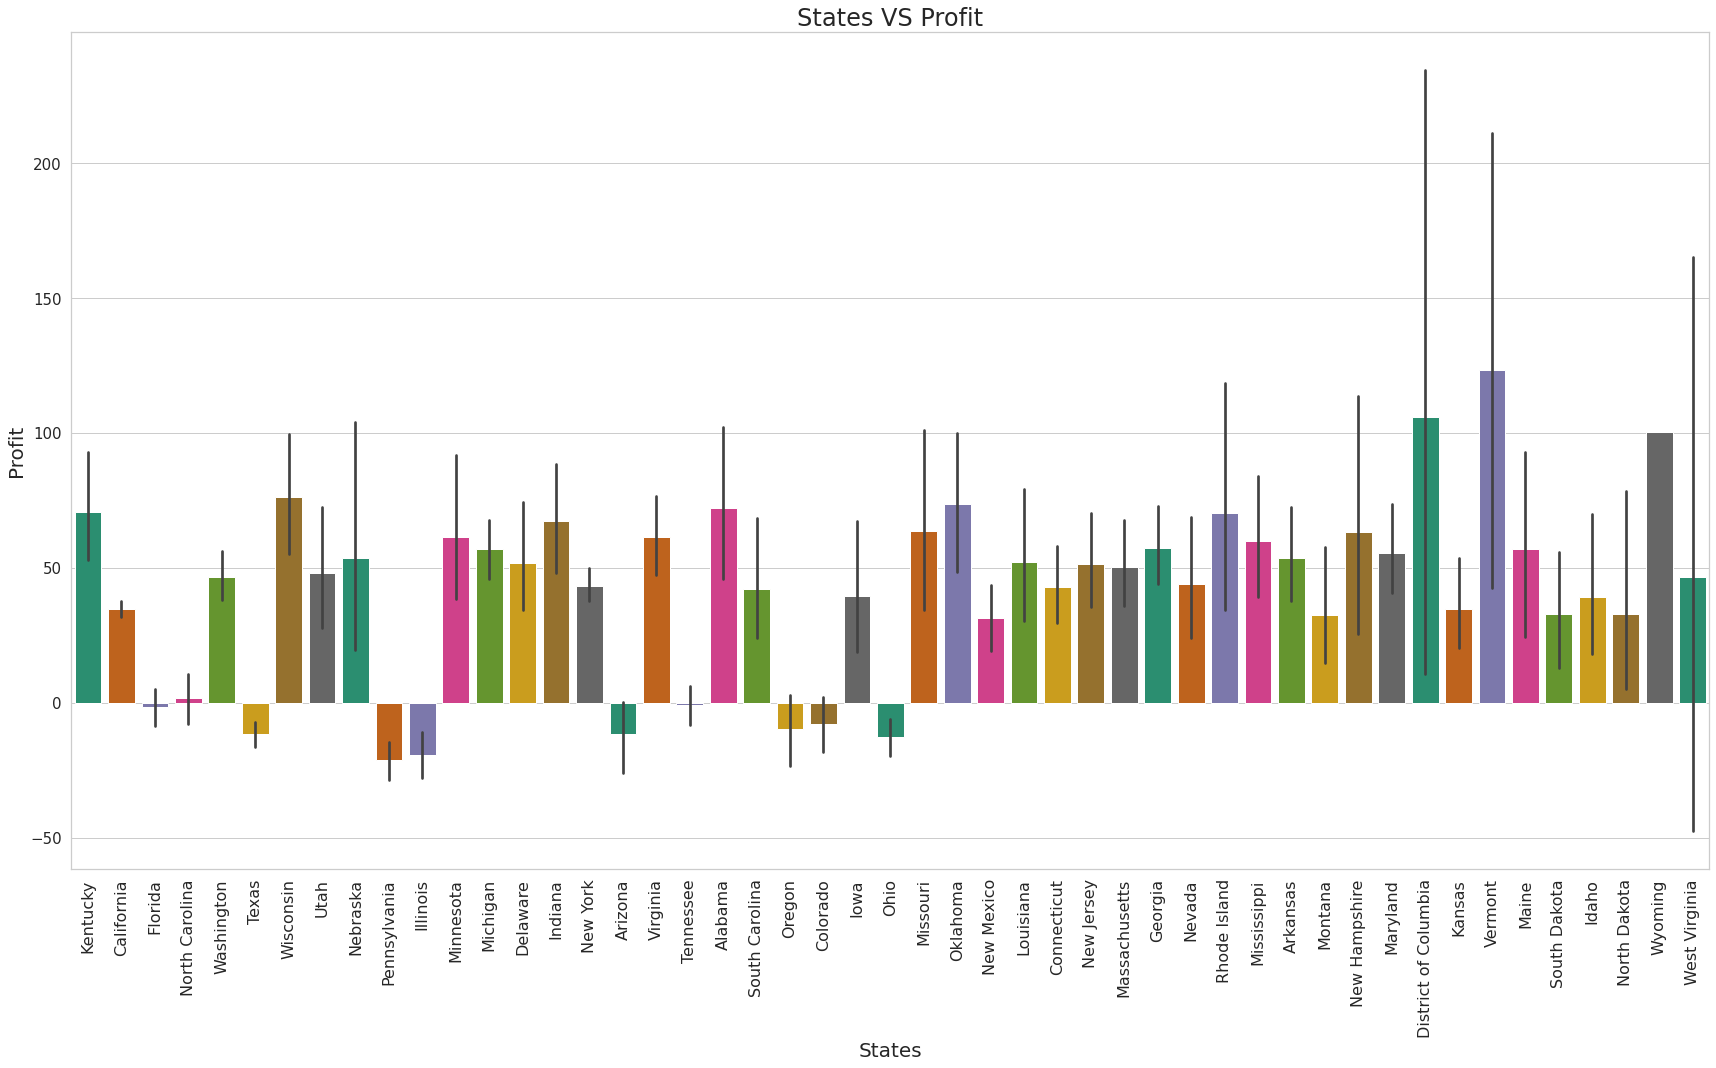

In [52]:
plt.figure(figsize=[24,15])
ax = sns.barplot(x="State", y="Profit", data=ds, palette="Dark2",)
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=15)
plt.title("States VS Profit",fontsize=24)
plt.xlabel("States",fontsize=20)
plt.ylabel("Profit",fontsize=20)
plt.tight_layout()

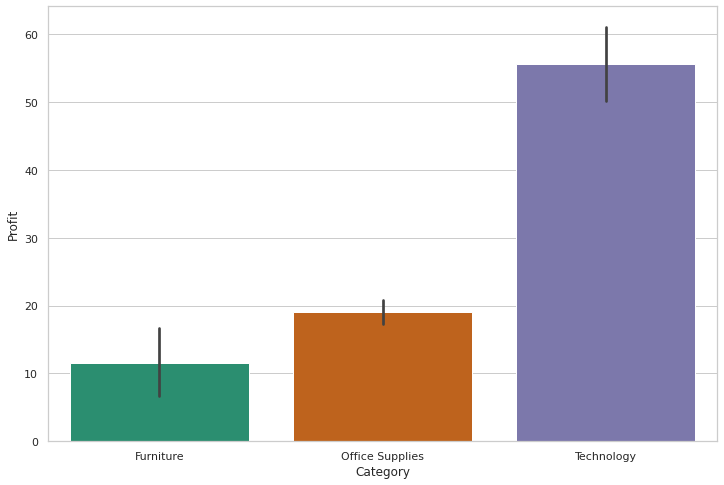

In [51]:
#Category Wise profit in the whole country
plt.figure(figsize=[12,8])Dark2
ax = sns.barplot(x="Category", y="Profit", data=ds, palette="Dark2")

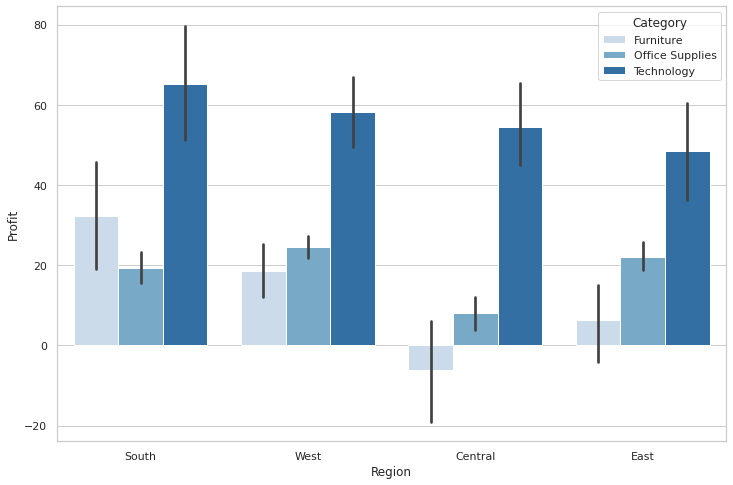

In [53]:
#Category wise Profit in Each Region
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Region", y="Profit", hue="Category", data=ds, palette="Blues")